In [66]:
#Load the libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns #
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 
import scipy.stats as stats


from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error

from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from tabulate import tabulate

In [67]:
#supress scientific notation of values
pd.options.display.float_format = '{:.2f}'.format
#increasing max number of columns and rows  displayed with pandas.
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 100)

## Step 1: Reading and Understanding the Data

In [68]:
#Importing the data
bike_sharing = pd.read_csv('day.csv')

In [69]:
#exploring the data using various parameters.
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600


In [70]:
#shape of data frame
bike_sharing.shape

(730, 16)

In [71]:
# Summary of the dataset 
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [72]:
#check the details of numeriacl data
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00
mean,365.50,2.50,0.50,6.53,0.03,3.00,0.68,1.39,20.32,23.73,62.77,12.76,849.25,3658.76,4508.01
std,210.88,1.11,0.50,3.45,0.17,2.01,0.47,0.54,7.51,8.15,14.24,5.20,686.48,1559.76,1936.01
min,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,2.42,3.95,0.00,1.50,2.00,20.00,22.00
25%,183.25,2.00,0.00,4.00,0.00,1.00,0.00,1.00,13.81,16.89,52.00,9.04,316.25,2502.25,3169.75
50%,365.50,3.00,0.50,7.00,0.00,3.00,1.00,1.00,20.47,24.37,62.62,12.13,717.00,3664.50,4548.50
75%,547.75,3.00,1.00,10.00,0.00,5.00,1.00,2.00,26.88,30.45,72.99,15.63,1096.50,4783.25,5966.00
max,730.00,4.00,1.00,12.00,1.00,6.00,1.00,3.00,35.33,42.04,97.25,34.00,3410.00,6946.00,8714.00


In [73]:
# checking for the null values in column data

bike_sharing.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [74]:
# renaming few columns for better readibility

bike_sharing.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [75]:
# Check the head of the dataset

bike_sharing.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600


In [76]:
# dropping the unwanted columns
# # Droping instant column as it is index column which has nothing to do with target,
# Dropping dteday as we have already have month and weekday columns to work with,
# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column,

bike_sharing.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [77]:
# Converting necessary numerical variables to categorical variables
bike_sharing['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
bike_sharing['weathersit'].replace({1:'Clear',2:'Misty or Cloudy',3:'Light Precipitation',4:'Heavy Precipitation'}, inplace=True)
bike_sharing['weekday'].replace({5:"Sunday",6:"Monday",0:"Tuesday",1:"Wednesday",2:"Thursday",3:"Friday",4:"Saturday"},inplace=True)

In [78]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


In [79]:
bike_sharing.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,1,0,Monday,0,Misty or Cloudy,14.11,18.18,80.58,10.75,985
1,spring,0,1,0,Tuesday,0,Misty or Cloudy,14.90,17.69,69.61,16.65,801
2,spring,0,1,0,Wednesday,1,Clear,8.05,9.47,43.73,16.64,1349
3,spring,0,1,0,Thursday,1,Clear,8.20,10.61,59.04,10.74,1562
4,spring,0,1,0,Friday,1,Clear,9.31,11.46,43.70,12.52,1600


## Step 2: Visualising the Data

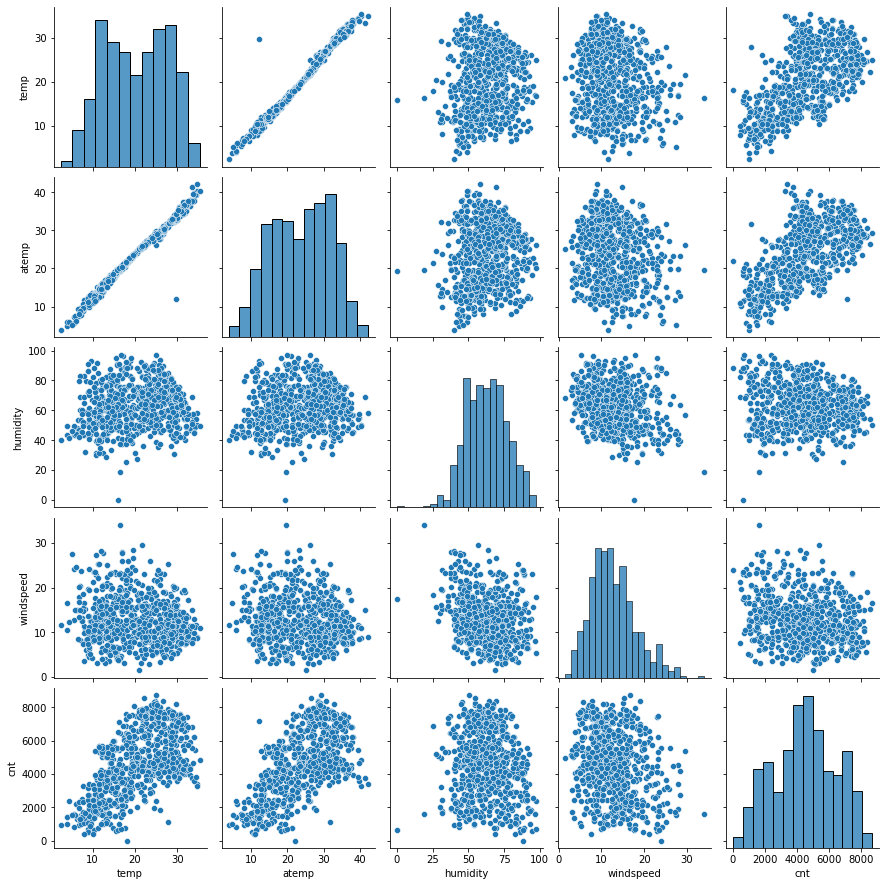

In [80]:
# Checking correlation in 5 numerical variable
sns.pairplot(bike_sharing, vars=['temp','atemp','humidity','windspeed',"cnt"])
plt.show()

#### Obeservations: 
- relationship between variables temp, atemp, hum, windspeed with the target variable cnt.
- temp and atemp are highly co-related with each other.

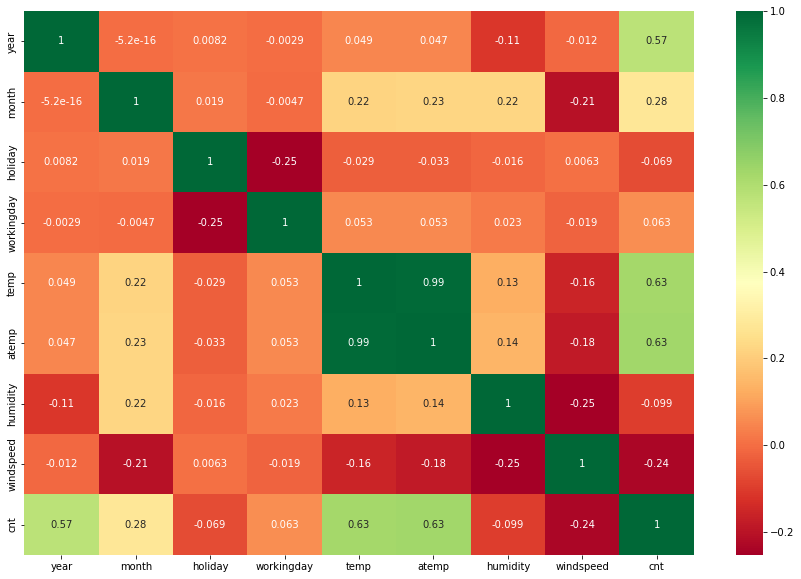

In [81]:
#correlation check to avoid multi-collinearity.
plt.figure(figsize = (15, 10))
sns.heatmap(bike_sharing.corr(), annot = True, cmap="RdYlGn")
plt.show()

### temp and atemp are highly positively correlated with a value of 0.99. 

In [82]:
# calculating VIF to find which variable to drop.

# numeric variable columns
vars = bike_sharing[['temp','atemp','humidity','windspeed',"cnt"]]

X = add_constant(vars)
v = pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)
v.sort_values(ascending=False)

atemp       63.94
temp        62.99
const       52.98
cnt          1.86
windspeed    1.19
humidity     1.18
dtype: float64

In [83]:
# atemp has a higher VIF, dropping that column to avoid muticollinearity.

bike_sharing.drop(['atemp'],axis=1,inplace=True)

## visualizing categorical variables with respect to target variable cnt using box plot

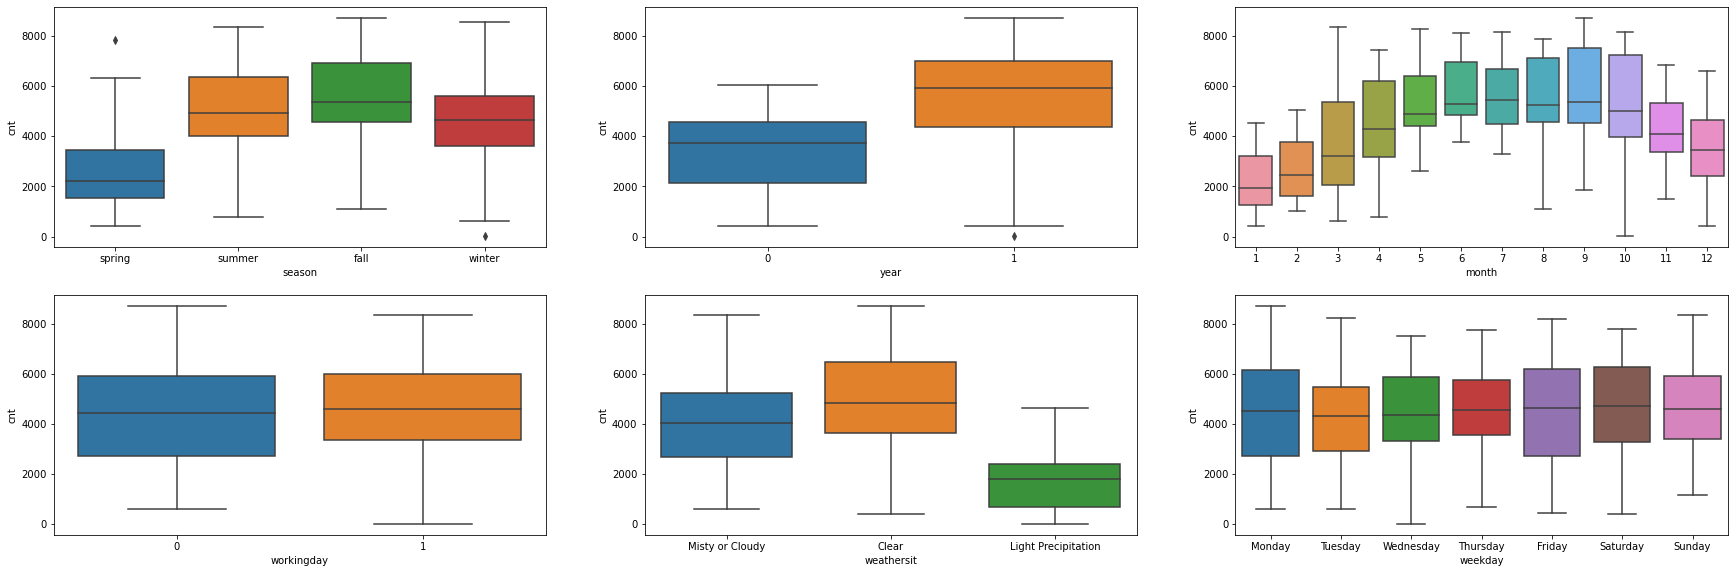

In [84]:

plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,2)
sns.boxplot(x = 'year', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,3)
sns.boxplot(x = 'month', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing)
plt.show()

### Obeservations: 
    -- Ride Count Seems to be in maximum in Fall
    -- Ride Count has increased drastically in 2019 as compared to 2018
    -- Ride Count seems to increase between March to October which are comparatively Fall(Autumn) & Summer Season in US
    -- Ride Count is lesser on Holidays as compared to other days.

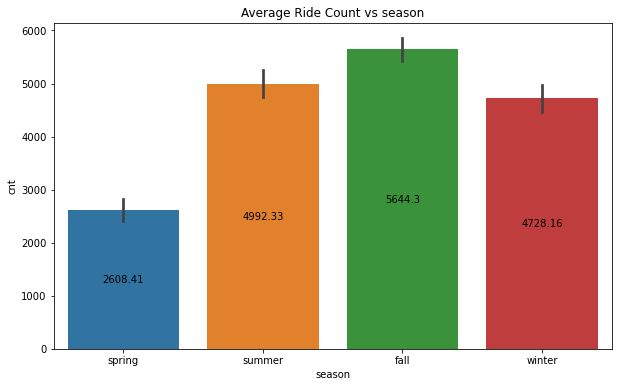

╒══════════╤══════════════════╤═════════╤═════════╤════════════╤══════════════╕
│ season   │              sum │    mean │   count │   sum in % │   count in % │
╞══════════╪══════════════════╪═════════╪═════════╪════════════╪══════════════╡
│ fall     │      1.06113e+06 │ 5644.3  │     188 │      32.24 │        25.75 │
├──────────┼──────────────────┼─────────┼─────────┼────────────┼──────────────┤
│ summer   │ 918589           │ 4992.33 │     184 │      27.91 │        25.21 │
├──────────┼──────────────────┼─────────┼─────────┼────────────┼──────────────┤
│ winter   │ 841613           │ 4728.16 │     178 │      25.57 │        24.38 │
├──────────┼──────────────────┼─────────┼─────────┼────────────┼──────────────┤
│ spring   │ 469514           │ 2608.41 │     180 │      14.27 │        24.66 │
╘══════════╧══════════════════╧═════════╧═════════╧════════════╧══════════════╛
-----------------------------------------------------------------------------------------------


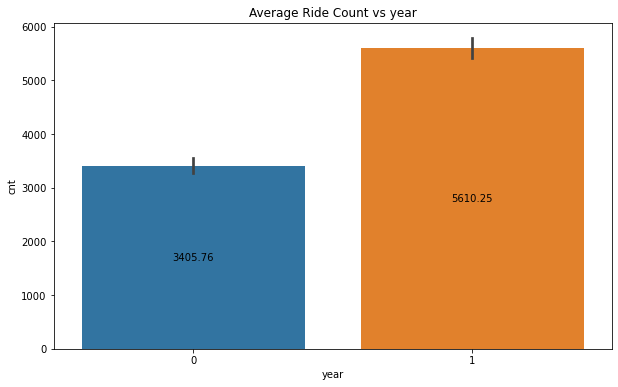

╒════════╤═════════════╤═════════╤═════════╤════════════╤══════════════╕
│   year │         sum │    mean │   count │   sum in % │   count in % │
╞════════╪═════════════╪═════════╪═════════╪════════════╪══════════════╡
│      1 │ 2.04774e+06 │ 5610.25 │     365 │      62.23 │           50 │
├────────┼─────────────┼─────────┼─────────┼────────────┼──────────────┤
│      0 │ 1.2431e+06  │ 3405.76 │     365 │      37.77 │           50 │
╘════════╧═════════════╧═════════╧═════════╧════════════╧══════════════╛
-----------------------------------------------------------------------------------------------


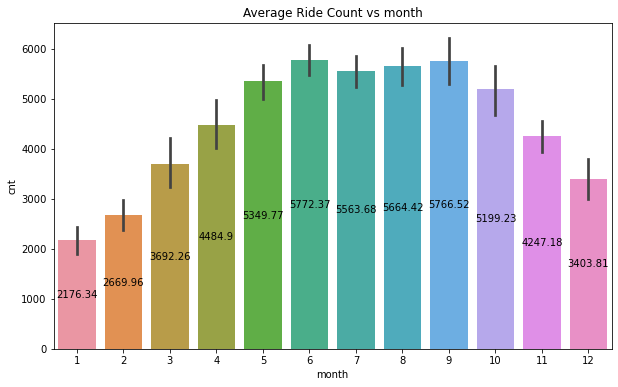

╒═════════╤════════╤═════════╤═════════╤════════════╤══════════════╕
│   month │    sum │    mean │   count │   sum in % │   count in % │
╞═════════╪════════╪═════════╪═════════╪════════════╪══════════════╡
│       8 │ 351194 │ 5664.42 │      62 │      10.67 │         8.49 │
├─────────┼────────┼─────────┼─────────┼────────────┼──────────────┤
│       6 │ 346342 │ 5772.37 │      60 │      10.52 │         8.22 │
├─────────┼────────┼─────────┼─────────┼────────────┼──────────────┤
│       9 │ 345991 │ 5766.52 │      60 │      10.51 │         8.22 │
├─────────┼────────┼─────────┼─────────┼────────────┼──────────────┤
│       7 │ 344948 │ 5563.68 │      62 │      10.48 │         8.49 │
├─────────┼────────┼─────────┼─────────┼────────────┼──────────────┤
│       5 │ 331686 │ 5349.77 │      62 │      10.08 │         8.49 │
├─────────┼────────┼─────────┼─────────┼────────────┼──────────────┤
│      10 │ 322352 │ 5199.23 │      62 │       9.8  │         8.49 │
├─────────┼────────┼─────────┼────

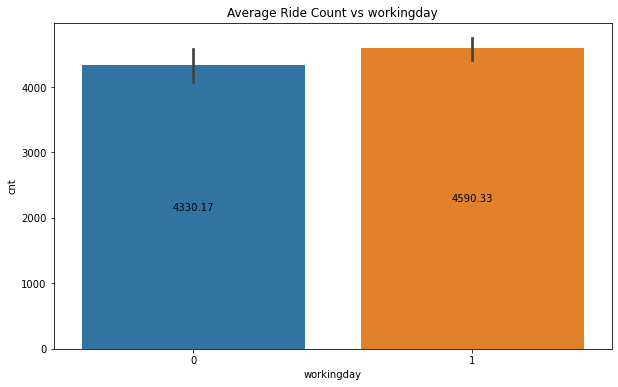

╒══════════════╤═════════════╤═════════╤═════════╤════════════╤══════════════╕
│   workingday │         sum │    mean │   count │   sum in % │   count in % │
╞══════════════╪═════════════╪═════════╪═════════╪════════════╪══════════════╡
│            1 │ 2.29058e+06 │ 4590.33 │     499 │       69.6 │        68.36 │
├──────────────┼─────────────┼─────────┼─────────┼────────────┼──────────────┤
│            0 │ 1.00027e+06 │ 4330.17 │     231 │       30.4 │        31.64 │
╘══════════════╧═════════════╧═════════╧═════════╧════════════╧══════════════╛
-----------------------------------------------------------------------------------------------


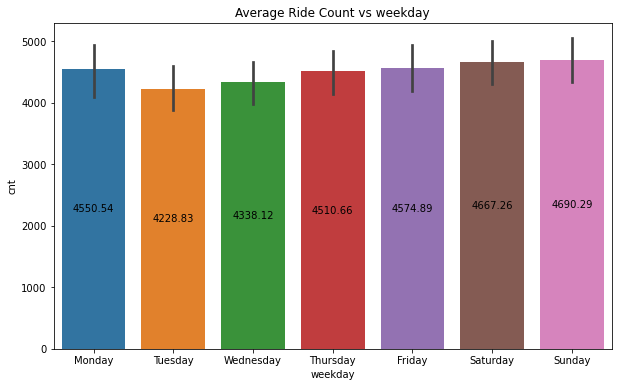

╒═══════════╤════════╤═════════╤═════════╤════════════╤══════════════╕
│ weekday   │    sum │    mean │   count │   sum in % │   count in % │
╞═══════════╪════════╪═════════╪═════════╪════════════╪══════════════╡
│ Sunday    │ 487790 │ 4690.29 │     104 │      14.82 │        14.25 │
├───────────┼────────┼─────────┼─────────┼────────────┼──────────────┤
│ Saturday  │ 485395 │ 4667.26 │     104 │      14.75 │        14.25 │
├───────────┼────────┼─────────┼─────────┼────────────┼──────────────┤
│ Monday    │ 477807 │ 4550.54 │     105 │      14.52 │        14.38 │
├───────────┼────────┼─────────┼─────────┼────────────┼──────────────┤
│ Friday    │ 471214 │ 4574.89 │     103 │      14.32 │        14.11 │
├───────────┼────────┼─────────┼─────────┼────────────┼──────────────┤
│ Thursday  │ 469109 │ 4510.66 │     104 │      14.25 │        14.25 │
├───────────┼────────┼─────────┼─────────┼────────────┼──────────────┤
│ Wednesday │ 455503 │ 4338.12 │     105 │      13.84 │        14.38 │
├─────

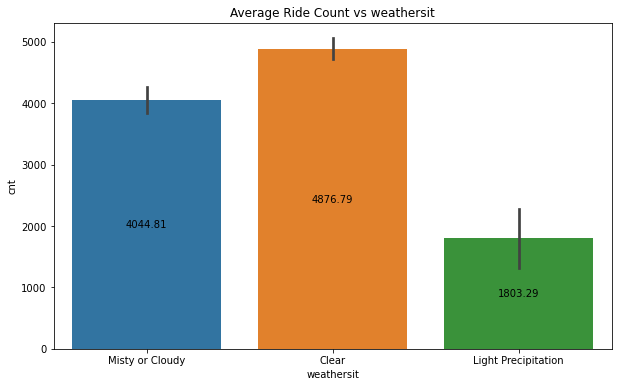

╒═════════════════════╤══════════════════╤═════════╤═════════╤════════════╤══════════════╕
│ weathersit          │              sum │    mean │   count │   sum in % │   count in % │
╞═════════════════════╪══════════════════╪═════════╪═════════╪════════════╪══════════════╡
│ Clear               │      2.25795e+06 │ 4876.79 │     463 │      68.61 │        63.42 │
├─────────────────────┼──────────────────┼─────────┼─────────┼────────────┼──────────────┤
│ Misty or Cloudy     │ 995024           │ 4044.81 │     246 │      30.24 │        33.7  │
├─────────────────────┼──────────────────┼─────────┼─────────┼────────────┼──────────────┤
│ Light Precipitation │  37869           │ 1803.29 │      21 │       1.15 │         2.88 │
╘═════════════════════╧══════════════════╧═════════╧═════════╧════════════╧══════════════╛
-----------------------------------------------------------------------------------------------


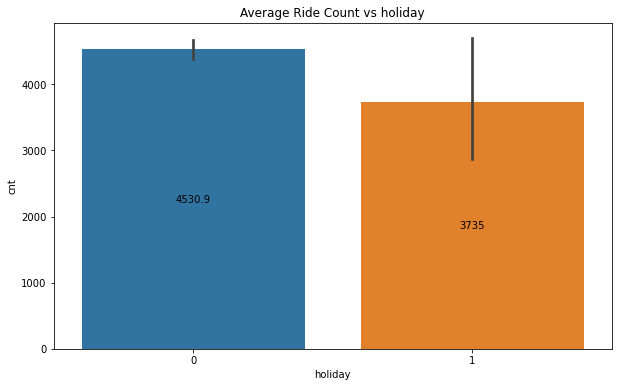

╒═══════════╤═════════════════╤════════╤═════════╤════════════╤══════════════╕
│   holiday │             sum │   mean │   count │   sum in % │   count in % │
╞═══════════╪═════════════════╪════════╪═════════╪════════════╪══════════════╡
│         0 │     3.21241e+06 │ 4530.9 │     709 │      97.62 │        97.12 │
├───────────┼─────────────────┼────────┼─────────┼────────────┼──────────────┤
│         1 │ 78435           │ 3735   │      21 │       2.38 │         2.88 │
╘═══════════╧═════════════════╧════════╧═════════╧════════════╧══════════════╛
-----------------------------------------------------------------------------------------------


In [85]:
# function to create bar plot of categorical variables
def bar_plt(categorical_var):
    plt.figure(figsize = (10, 6))
    plt.title("Average Ride Count vs "+str(categorical_var))
    ax = sns.barplot(x=categorical_var, y='cnt', data=bike_sharing)
    ax.bar_label(ax.containers[0],label_type='center')
    plt.show()

    
# function to generate Statistical summary
def stats_cat(categorical_var):
    cat = bike_sharing.groupby(categorical_var)['cnt'].agg(['sum', 'mean','count']).sort_values('sum',ascending = False)
    cat['sum in %']=cat['sum']/bike_sharing.cnt.sum()*100
    cat['count in %']=cat['count']/bike_sharing.cnt.count()*100
    headers = [categorical_var, "sum", "mean" , "count", "sum in %", "count in %"]
    print(tabulate(round(cat,2), headers, tablefmt='fancy_grid'))
    
            

# plotting bar plot of Categorical variables Vs Count

cat_var = ['season','year','month','workingday','weekday','weathersit','holiday']

for i in cat_var:
    bar_plt(i)
    stats_cat(i)
    
    print("-----------------------------------------------------------------------------------------------")


## Step 3: Data Preparation

In [21]:
# Dummy Variables

Season = pd.get_dummies(bike_sharing['season'],drop_first=True)
Weather = pd.get_dummies(bike_sharing['weathersit'],drop_first=True)
Day = pd.get_dummies(bike_sharing['weekday'],drop_first=True)
Month = pd.get_dummies(bike_sharing['month'],drop_first=True)

In [22]:
bike_sharing =pd.concat([bike_sharing,Season, Weather, Day, Month],axis=1)
bike_sharing

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,cnt,spring,summer,winter,Light Precipitation,Misty or Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,2,3,4,5,6,7,8,9,10,11,12
0,spring,0,1,0,Monday,0,Misty or Cloudy,14.11,80.58,10.75,985,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,spring,0,1,0,Tuesday,0,Misty or Cloudy,14.90,69.61,16.65,801,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,spring,0,1,0,Wednesday,1,Clear,8.05,43.73,16.64,1349,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,spring,0,1,0,Thursday,1,Clear,8.20,59.04,10.74,1562,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,spring,0,1,0,Friday,1,Clear,9.31,43.70,12.52,1600,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,12,0,Saturday,1,Misty or Cloudy,10.42,65.29,23.46,2114,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
726,spring,1,12,0,Sunday,1,Misty or Cloudy,10.39,59.00,10.42,3095,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
727,spring,1,12,0,Monday,0,Misty or Cloudy,10.39,75.29,8.33,1341,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
728,spring,1,12,0,Tuesday,0,Clear,10.49,48.33,23.50,1796,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [23]:
#Dropping the orginal season,weathersit,weekday columns
bike_sharing.drop(['season', 'weathersit', 'weekday','month'],axis=1,inplace=True)
bike_sharing.head()

,year,holiday,workingday,temp,humidity,windspeed,cnt,spring,summer,winter,Light Precipitation,Misty or Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,14.11,80.58,10.75,985,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,14.90,69.61,16.65,801,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.05,43.73,16.64,1349,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.20,59.04,10.74,1562,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.31,43.70,12.52,1600,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



## Step 4: Splitting the Data into Training and Testing Sets

In [24]:
# Splitting the data to Train and Test sets
train, test = train_test_split(bike_sharing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [25]:
train.head()

,year,holiday,workingday,temp,humidity,windspeed,cnt,spring,summer,winter,Light Precipitation,Misty or Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,2,3,4,5,6,7,8,9,10,11,12
653,1,0,1,19.20,55.83,12.21,7534,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
576,1,0,1,29.25,70.42,11.08,7216,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.98,62.12,10.79,4066,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
728,1,0,0,10.49,48.33,23.50,1796,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
482,1,0,0,15.44,48.96,8.71,4220,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [26]:
print(train.shape)
print(test.shape)

(510, 29)
(219, 29)


In [27]:
test.head()

,year,holiday,workingday,temp,humidity,windspeed,cnt,spring,summer,winter,Light Precipitation,Misty or Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,2,3,4,5,6,7,8,9,10,11,12
184,0,1,0,29.79,63.79,5.46,6043,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
535,1,0,1,32.08,59.21,7.63,6211,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
299,0,0,1,19.27,81.29,13.25,2659,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
221,0,0,1,31.43,42.42,13.42,4780,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
152,0,0,1,29.32,30.50,19.58,4968,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [28]:
bike_sharing.describe()

,year,holiday,workingday,temp,humidity,windspeed,cnt,spring,summer,winter,Light Precipitation,Misty or Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,2,3,4,5,6,7,8,9,10,11,12
count,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00
mean,0.50,0.03,0.68,20.32,62.77,12.76,4508.01,0.25,0.25,0.24,0.03,0.34,0.14,0.14,0.14,0.14,0.14,0.14,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08
std,0.50,0.17,0.47,7.51,14.24,5.20,1936.01,0.43,0.43,0.43,0.17,0.47,0.35,0.35,0.35,0.35,0.35,0.35,0.27,0.28,0.27,0.28,0.27,0.28,0.28,0.27,0.28,0.27,0.28
min,0.00,0.00,0.00,2.42,0.00,1.50,22.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,13.81,52.00,9.04,3169.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.50,0.00,1.00,20.47,62.62,12.13,4548.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1.00,0.00,1.00,26.88,72.99,15.63,5966.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,1.00,1.00,1.00,35.33,97.25,34.00,8714.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [29]:
#Scaling Numeric data using MinMax scalar as it will not affect dummy variables
scaler=MinMaxScaler()
num_vars=['temp','humidity','windspeed','cnt']
train[num_vars] = scaler.fit_transform(train[num_vars])
train.head()

,year,holiday,workingday,temp,humidity,windspeed,cnt,spring,summer,winter,Light Precipitation,Misty or Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,2,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.51,0.58,0.30,0.86,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.82,0.73,0.26,0.83,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.44,0.64,0.26,0.47,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.25,0.50,0.66,0.20,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.40,0.50,0.19,0.48,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [30]:
#Splitting the train data into independent(x) variables and target(y) variable.
y_train = train.pop('cnt')
x_train = train

In [31]:

x_train.head()

,year,holiday,workingday,temp,humidity,windspeed,spring,summer,winter,Light Precipitation,Misty or Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,2,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.51,0.58,0.30,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.82,0.73,0.26,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.44,0.64,0.26,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.25,0.50,0.66,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.40,0.50,0.19,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [32]:

y_train.head()

653   0.86
576   0.83
426   0.47
728   0.20
482   0.48
Name: cnt, dtype: float64

## Step 5: Building a linear model

In [33]:
# Fitting the linear regression on train dataset

lm = LinearRegression()
lm.fit(x_train, y_train)

#Selecting features using RFE
rfe = RFE(lm)
rfe = rfe.fit(x_train, y_train)

In [34]:
# Displaying influence of each of the independent variable using rfe ranking
rfe_df = pd.DataFrame({'Predictor': x_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

,Predictor,Select Status,Ranking
0,year,True,1
19,4,True,1
18,3,True,1
24,9,True,1
20,5,True,1
9,Light Precipitation,True,1
8,winter,True,1
10,Misty or Cloudy,True,1
6,spring,True,1
5,windspeed,True,1


In [35]:
# Selecting the influencing independent variables from the rfe ranking list
select = x_train.columns[rfe.support_]
select

Index([               'year',             'holiday',                'temp',
                  'humidity',           'windspeed',              'spring',
                    'winter', 'Light Precipitation',     'Misty or Cloudy',
                           3,                     4,                     5,
                           6,                     9],
      dtype='object')

In [36]:
# Assigning the selected varaibles to the x data to build the actual model
x_train_rfe = x_train[select]

#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(x_train_rfe[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm


In [37]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = x_train_rfe[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif
    headers = ['Features', 'VIF']
    print(tabulate(round(vif,2), headers, tablefmt='fancy_grid'))

In [38]:
# Start with all variables selected by RFE
cols = x_train_rfe.columns
build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.8
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          3.52e-187
Time:                        16:12:22   Log-Likelihood:                 507.16
No. Observations:                 510   AIC:                            -984.3
Df Residuals:                     495   BIC:                            -920.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2977    

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [39]:
cols = x_train_rfe.columns
get_vif(cols)


╒════╤═════════════════════╤═══════╕
│    │ Features            │   VIF │
╞════╪═════════════════════╪═══════╡
│  3 │ humidity            │ 25.47 │
├────┼─────────────────────┼───────┤
│  2 │ temp                │ 14.88 │
├────┼─────────────────────┼───────┤
│  4 │ windspeed           │  4.68 │
├────┼─────────────────────┼───────┤
│  5 │ spring              │  3.4  │
├────┼─────────────────────┼───────┤
│  6 │ winter              │  2.84 │
├────┼─────────────────────┼───────┤
│  8 │ Misty or Cloudy     │  2.26 │
├────┼─────────────────────┼───────┤
│  0 │ year                │  2.09 │
├────┼─────────────────────┼───────┤
│ 10 │ 4                   │  1.51 │
├────┼─────────────────────┼───────┤
│ 11 │ 5                   │  1.46 │
├────┼─────────────────────┼───────┤
│ 12 │ 6                   │  1.35 │
├────┼─────────────────────┼───────┤
│  9 │ 3                   │  1.3  │
├────┼─────────────────────┼───────┤
│ 13 │ 9                   │  1.28 │
├────┼─────────────────────┼───────┤
│

### Dropping the Variable and Updating the Model

In [40]:
# Dropping 6 it's p-value is higher than 0.05, and hence it's not significant
x_train_rfe = x_train_rfe.drop(6, axis =1)
cols = x_train_rfe.columns
build_model(cols)
get_vif(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     200.0
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.25e-187
Time:                        16:12:22   Log-Likelihood:                 505.47
No. Observations:                 510   AIC:                            -982.9
Df Residuals:                     496   BIC:                            -923.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3065    

Now all p-values are within the acceptable range of <0.05

### Dropping the Variable and Updating the Model

In [41]:
# humidity has the highest VIF, dropping it.
x_train_rfe = x_train_rfe.drop('humidity', axis =1)
cols = x_train_rfe.columns
build_model(cols)

get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     208.2
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          4.89e-185
Time:                        16:12:22   Log-Likelihood:                 496.52
No. Observations:                 510   AIC:                            -967.0
Df Residuals:                     497   BIC:                            -912.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2218    

## Step 6: Residual Analysis of the train data

In [42]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [43]:
cols = x_train_rfe.columns
lr = build_model_sk(x_train_rfe[cols],y_train)
y_train_pred = lr.predict(x_train_rfe[cols])


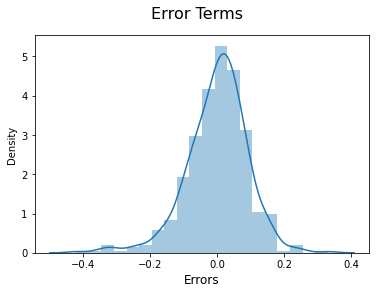

In [44]:
error = y_train - y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(error, bins = 20)
fig.suptitle('Error Terms', fontsize = 16)                  
plt.xlabel('Errors', fontsize = 12)   
plt.show()

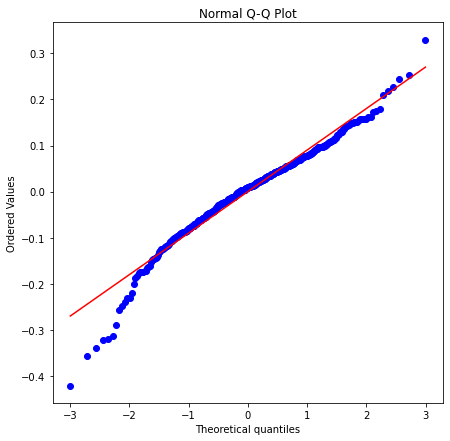

In [45]:
# Plotting Q-Q plot to confirm normal distribution of errors
plt.figure(figsize=(7,7))
stats.probplot(error, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")
plt.show()

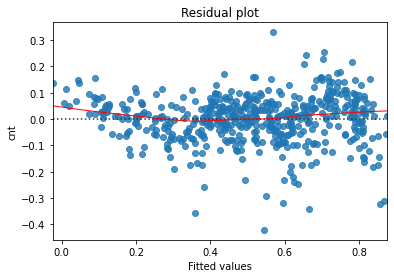

In [46]:
# Plot the scatter plot of the error terms vs 
fig = plt.figure()
sns.residplot(y_train_pred,y_train, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot')    
plt.show()

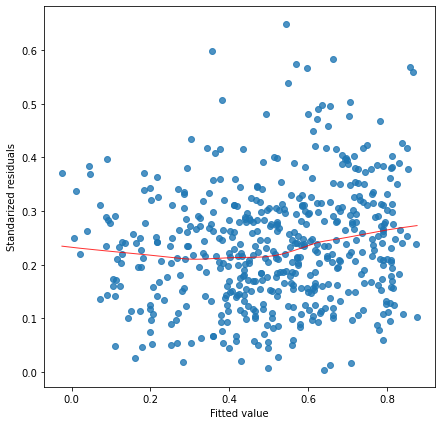

In [47]:
# Plotting Scale-Location plot to verify the homoscedasticity of residuals
norm_residuals_abs_sqrt=np.sqrt(np.abs(error))

plt.figure(figsize=(7,7))
sns.regplot(y_train_pred, norm_residuals_abs_sqrt,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")
plt.show()

In [48]:
# Claculating mean of Residuals
round((y_train-y_train_pred).mean(),2)

0.0

## Step 7: Making Predictions Using the Final Model

In [49]:
# Applying the scaling on the test sets
num_vars=['temp', 'humidity' ,'windspeed','cnt']
test[num_vars]= scaler.transform(test[num_vars])

In [50]:
y_test = test.pop('cnt')
x_test = test

In [51]:
# Modifying X_test dataframe by dropping variables eliminated variables from X_test and assigning it to a new data frame
cols = x_train_rfe.columns

X_test = x_test[x_train_rfe.columns]

# Adding a constant variable 
X_test = sm.add_constant(X_test)

In [52]:
# Making predictions
cols = x_train_rfe.columns
y_pred = lr.predict(X_test[cols])

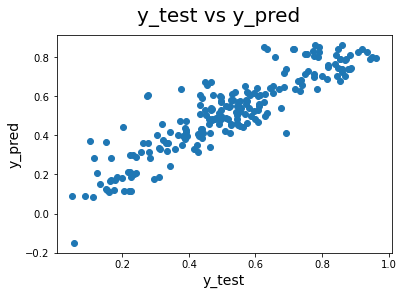

In [53]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=14)                          # X-label
plt.ylabel('y_pred', fontsize=14)                          # Y-label
plt.show()

In [54]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_pred)
print("Rsquared value of train data: ", r2_train )
print("Rsquared value of test data: ", r2_test )

Rsquared value of train data:  0.8340601645048038
Rsquared value of test data:  0.8073113447598943


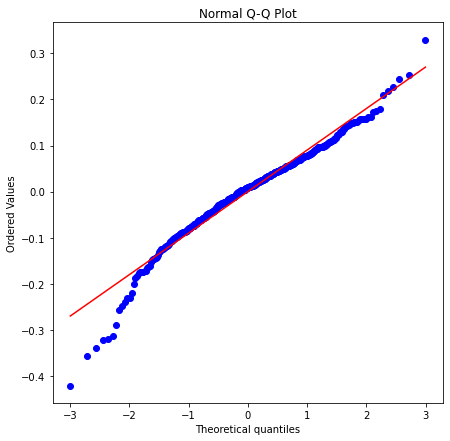

In [55]:
# Plotting Q-Q plot to confirm normal distribution of errors
plt.figure(figsize=(7,7))
stats.probplot(error, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")
plt.show()

In [56]:
adj_r2_train = 1-(1-r2_train)*(510-1)/(510-11-1)
adj_r2_test = 1-(1-r2_test)*(219-1)/(219-11-1)
print("Adjusted Rsquared value of train data: ", adj_r2_train )
print("Adjusted Rsquared value of test data : ", adj_r2_test )

Adjusted Rsquared value of train data:  0.8303948267729822
Adjusted Rsquared value of test data :  0.7970718510031737


In [57]:
# calculate the mean squared error of train and test data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_pred)
print('MSE Train: ', mse_train)
print('MSE Test: ', mse_test)

MSE Train:  0.008353896389753443
MSE Test:  0.009151903402020153


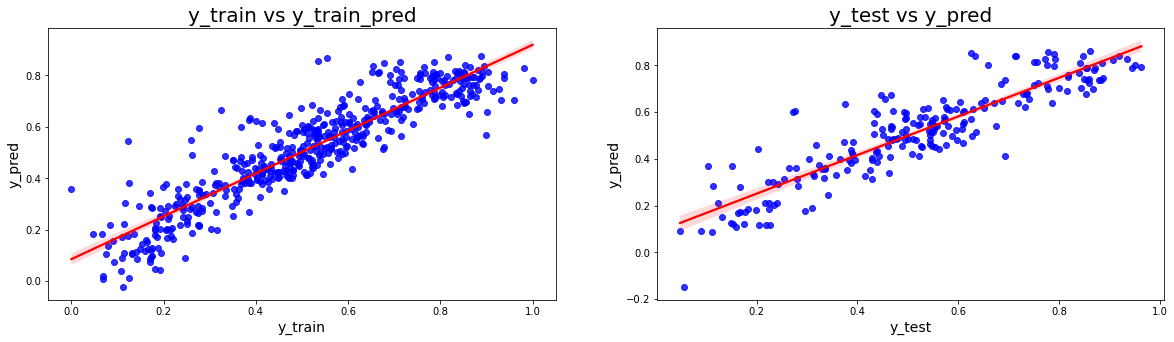

In [58]:
# 1) The predicted values have linear relationship with the actual values.
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.regplot( y_train, y_train_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_train vs y_train_pred', fontsize=20)              
plt.xlabel('y_train', fontsize=14)  
plt.ylabel('y_pred', fontsize=14) 

plt.subplot(1,2,2)
sns.regplot( y_test, y_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)   
plt.xlabel('y_test', fontsize=14)   
plt.ylabel('y_pred', fontsize=14) 

plt.show()

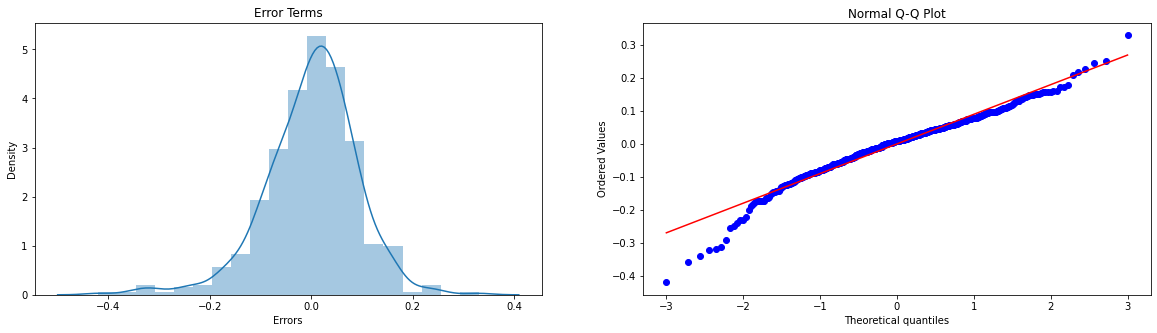

In [59]:
# 2) The error terms are normally distributed.
error = y_train - y_train_pred
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.distplot(error, bins = 20)
plt.title('Error Terms')                  
plt.xlabel('Errors')    

plt.subplot(1,2,2)
stats.probplot(error, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")
plt.show()

In [60]:
# 3) The training and testing accuracy are nearly equal hence there is no Overfit/Underfit situation.
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_pred)
print("Rsquared value of train data: ", r2_train )
print("Rsquared value of test data: ", r2_test )

Rsquared value of train data:  0.8340601645048038
Rsquared value of test data:  0.8073113447598943


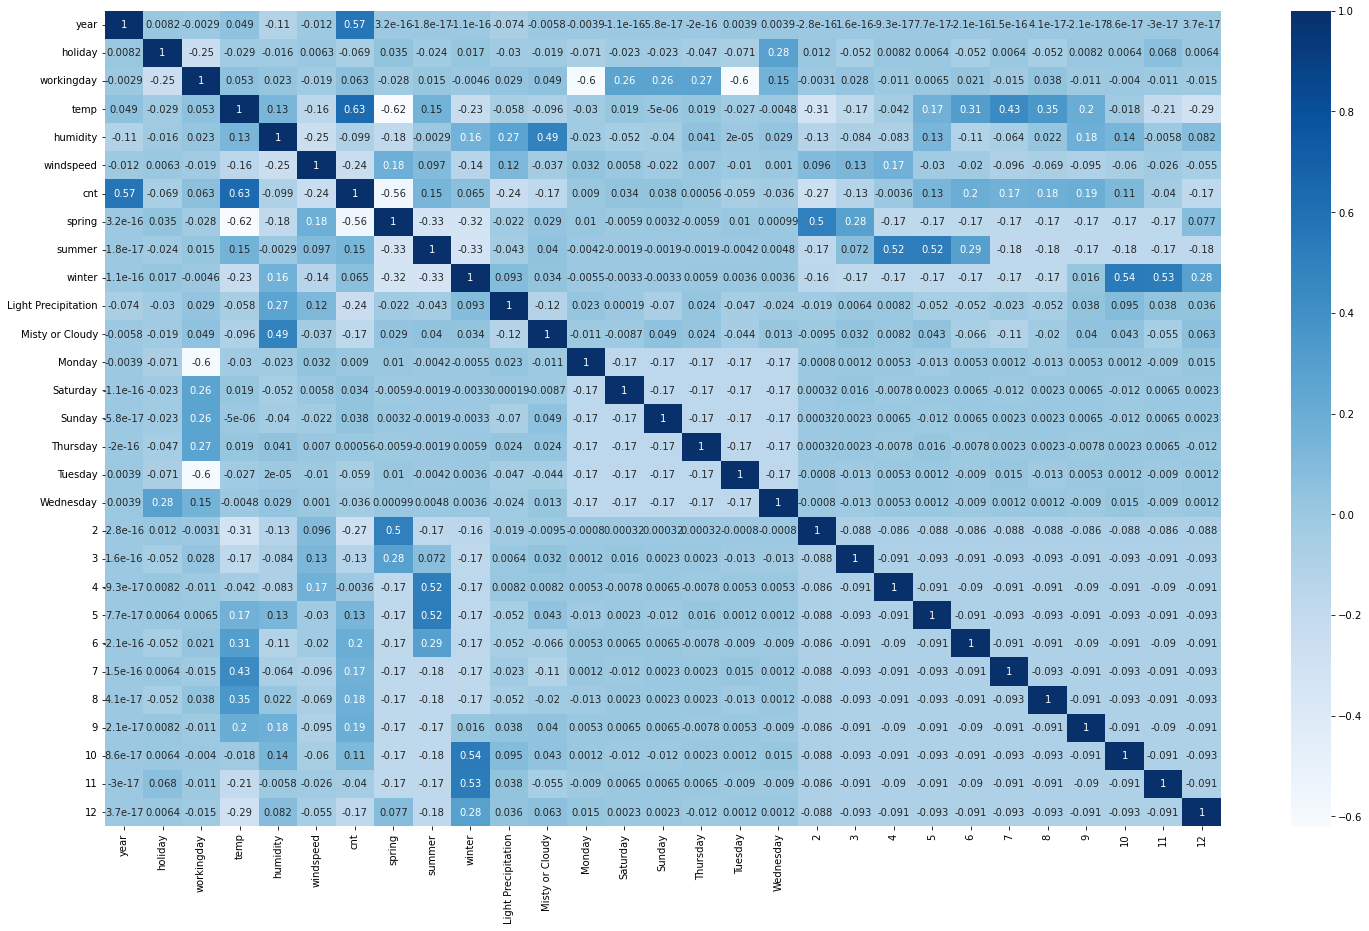

╒════╤═════════════════════╤═══════╕
│    │ Features            │   VIF │
╞════╪═════════════════════╪═══════╡
│  3 │ windspeed           │  4.64 │
├────┼─────────────────────┼───────┤
│  2 │ temp                │  3.93 │
├────┼─────────────────────┼───────┤
│  0 │ year                │  2.08 │
├────┼─────────────────────┼───────┤
│  4 │ spring              │  1.95 │
├────┼─────────────────────┼───────┤
│  5 │ winter              │  1.55 │
├────┼─────────────────────┼───────┤
│  7 │ Misty or Cloudy     │  1.53 │
├────┼─────────────────────┼───────┤
│  9 │ 4                   │  1.33 │
├────┼─────────────────────┼───────┤
│  8 │ 3                   │  1.28 │
├────┼─────────────────────┼───────┤
│ 10 │ 5                   │  1.25 │
├────┼─────────────────────┼───────┤
│ 11 │ 9                   │  1.2  │
├────┼─────────────────────┼───────┤
│  6 │ Light Precipitation │  1.08 │
├────┼─────────────────────┼───────┤
│  1 │ holiday             │  1.05 │
╘════╧═════════════════════╧═══════╛


In [61]:
# 4) There is no Multicollinearity between two independent variables.
plt.figure(figsize = (25, 15))
sns.heatmap(bike_sharing.corr(), annot = True, cmap="Blues")
plt.show()
cols = x_train_rfe.columns
get_vif(cols)

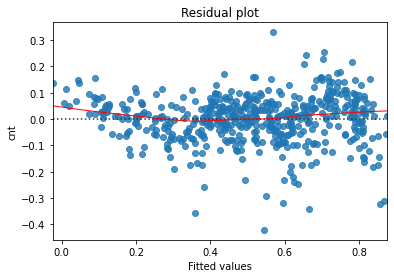

In [62]:
# 5) Homoscedasticity of Residuals.
fig = plt.figure()
sns.residplot(y_train_pred,y_train,lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot')    
plt.show()

In [63]:
# 6) There are  at least 20 records of all independent variables.
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   humidity             730 non-null    float64
 5   windspeed            730 non-null    float64
 6   cnt                  730 non-null    int64  
 7   spring               730 non-null    uint8  
 8   summer               730 non-null    uint8  
 9   winter               730 non-null    uint8  
 10  Light Precipitation  730 non-null    uint8  
 11  Misty or Cloudy      730 non-null    uint8  
 12  Monday               730 non-null    uint8  
 13  Saturday             730 non-null    uint8  
 14  Sunday               730 non-null    uint8  
 15  Thursday             730 non-null    uin

In [64]:
# 7) All categorical are converted to numeric dummy variables
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 510 non-null    int64  
 1   holiday              510 non-null    int64  
 2   workingday           510 non-null    int64  
 3   temp                 510 non-null    float64
 4   humidity             510 non-null    float64
 5   windspeed            510 non-null    float64
 6   spring               510 non-null    uint8  
 7   summer               510 non-null    uint8  
 8   winter               510 non-null    uint8  
 9   Light Precipitation  510 non-null    uint8  
 10  Misty or Cloudy      510 non-null    uint8  
 11  Monday               510 non-null    uint8  
 12  Saturday             510 non-null    uint8  
 13  Sunday               510 non-null    uint8  
 14  Thursday             510 non-null    uint8  
 15  Tuesday              510 non-null    ui

In [65]:
#The final model selected is as below

cols = x_train_rfe.columns
lm =  build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     208.2
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          4.89e-185
Time:                        16:12:31   Log-Likelihood:                 496.52
No. Observations:                 510   AIC:                            -967.0
Df Residuals:                     497   BIC:                            -912.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2218    

 - Demand of bikes depend on year, temperature, winter, and months March, April, May and September.
 - wind speed, spring, Light Precipitation, Misty or Cloudy atmosphere have a negative impact on the count of bike rentals

# Comparision between Training and Testing dataset:

- Rsquared value of train data:  0.8340601645048038
- Rsquared value of test data:  0.8073113447598943

- Adjusted Rsquared value of train data:  0.8303948267729822
- Adjusted Rsquared value of test data :  0.7970718510031737

The model has a good R^2 score of 0.807(80.7%) on the test data.